# Limpieza_datos/Data cleaning
    
    Evaluación de valores nulos (filas y columnas)/null values
        Evaluación de formato válido/ valid format
        Valores ajustados en rangos (ver anexos)
        Claves únicas/ key unicity
        Integridad referencial
        Cumplimiento de reglas en valores


## Lectura datos

In [1]:
import numpy as np
import pandas as pd

In [2]:
tarjeta = pd.read_csv("~/Trabajo_tfm/datos_csv/tarjeta_datos.csv", ',', index_col='Unnamed: 0')
tarjeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7076
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              7077 non-null   object 
 1   provincia          7077 non-null   object 
 2   v_muy_cortos       7077 non-null   float64
 3   v_cortos           7077 non-null   float64
 4   v_medios           7077 non-null   float64
 5   v_largos           7077 non-null   float64
 6   v_muy_largos       7077 non-null   float64
 7   v_extra_largos     7077 non-null   float64
 8   v_noche            7077 non-null   float64
 9   v_madrugada        7077 non-null   float64
 10  v_mañana           7077 non-null   float64
 11  v_mediodia         7077 non-null   float64
 12  v_sobremesa        7077 non-null   float64
 13  v_tarde            7077 non-null   float64
 14  v_km_muy_cortos    7077 non-null   float64
 15  v_km_cortos        7077 non-null   float64
 16  v_km_medios        7077 

/home/jose/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


## Registro de Metadatos del dataset/Metadata

In [5]:
# Funcion para estudio preliminar 
def descripcionDatosDataset(datos):
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])
 
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            valoresDescripcion = {'valoresPresentes' : datos[columna].unique(), 
                                  'cantidadNulos' : datos[columna].isna().sum()}
                                 #'conteoValores' : pd.value_counts(datos[columna])}
                
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        
        if tipo == 'numérico':
            print(valoresDescripcion)

        else:
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:20]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' +
                  str(valoresDescripcion['cantidadNulos']) + ' = ' +  "{0:.2f}".format(pctNulos) + '%')
        print('-'*100)

### Exploración de datos

In [6]:
descripcionDatosDataset(tarjeta) # salida a documento

Cantidad de filas: 7077
Cantidad de columnas: 42
----------------------------------------------------------------------------------------------------
Columna: fecha
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['2020-03-01' '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05'
 '2020-03-06' '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10'
 '2020-03-11' '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15'
 '2020-03-16' '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: provincia
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['ALICANTE' 'ALMERIA' 'BADAJOZ' 'CADIZ' 'CIUDAD_REAL' 'CORDOBA' 'CORUÑA'
 'GRANADA' 'HUELVA' 'JAEN' 'LUGO' 'MADRID' 'MALAGA' 'ORENSE' 'PALENCIA'
 'PONTEVEDRA' 'SALAMANCA' 'SEVILLA' 'VALENCIA' 'ZAMORA']
-- Cantidad de nulos: 0 = 0.00%
------------------

**(1) Valores nulos por filas**
Cantidad de filas por atributo en las que existen valores nulos

In [7]:
#Se comienza por obtener la cantidad de filas por atributo en las que existen valores nulos
cantidad_filas= tarjeta.shape[0]
cantidad_columnas = tarjeta.shape[1]
print(f"Cantidad de filas: {tarjeta.shape[0]}")
print(f"Cantidad de filas completas: {tarjeta.dropna().shape[0]}")

filas_incompletas = tarjeta.shape[0] -tarjeta.dropna().shape[0]
#filas_nulas = tarjeta.isnull().sum().sum()
columnas_nulas = tarjeta.isnull().sum()

#print(f"Cantidad de columnas nulas entre todos los atributos: \n{columnas_nulas}")
print(f"Cantidad de filas  incompletas: {filas_incompletas}")
print(f"Porcentaje de filas incompletas: {(filas_incompletas / cantidad_filas)*100} %")
print(f"Cantidad de nulos en las columnas nulas : \n{columnas_nulas}")


Cantidad de filas: 7077
Cantidad de filas completas: 5855
Cantidad de filas  incompletas: 1222
Porcentaje de filas incompletas: 17.267203617351985 %
Cantidad de nulos en las columnas nulas : 
fecha                   0
provincia               0
v_muy_cortos            0
v_cortos                0
v_medios                0
v_largos                0
v_muy_largos            0
v_extra_largos          0
v_noche                 0
v_madrugada             0
v_mañana                0
v_mediodia              0
v_sobremesa             0
v_tarde                 0
v_km_muy_cortos         0
v_km_cortos             0
v_km_medios             0
v_km_largos             0
v_km_muy_largos         0
v_km_extra_largos       0
v_km_noche              0
v_km_madrugada          0
v_km_mañana             0
v_km_mediodia           0
v_km_sobremesa          0
v_km_tarde              0
cero_viajes             0
un_viaje                0
dos_viajes              0
mas_de_dos_viajes       0
num_casos               0
po

In [8]:
filas_nulas_tarjeta = tarjeta.isnull().sum().sum()
print(f"Cantidad de nulos en las filas de la tarjeta: {filas_nulas_tarjeta}")

Cantidad de nulos en las filas de la tarjeta: 1546


In [9]:
# Cuenta las filas con valores nules mayores que el criterio de calidad establecido
def nulos_x_fila(fila):
    nulos = cantidad_columnas - fila.count() #Se calcula la cantidad de valores nulos en la fila
    umbral = 0.2 
    #Se evalua si se supera el umbral definido
    if (nulos > (cantidad_columnas * umbral)):
        #print(" ***  nxl", fila)
        return 'err'
    else:
        return 'ok'

# Se obtiene la cantidad de errores detectados
tarjeta['completitudF'] = tarjeta.apply(lambda row: nulos_x_fila(row), axis=1)
print(tarjeta['completitudF'].value_counts())

# Se visualizan las tuplas con errores
tarjeta[tarjeta.completitudF == 'err']
filas_err = tarjeta[tarjeta.completitudF == 'err'].shape[0]

print(f"Cantidad de filas que tienen valores nulos más allá del umbral definido: {filas_err}")
print(f"Porcentaje de filas que tienen valores nulos más allá del umbral definido: {(filas_err / cantidad_filas)*100} %")

ok    7077
Name: completitudF, dtype: int64
Cantidad de filas que tienen valores nulos más allá del umbral definido: 0
Porcentaje de filas que tienen valores nulos más allá del umbral definido: 0.0 %


In [10]:
errorescomp=  tarjeta[tarjeta.completitudF == 'err']
errorescomp.shape#  Listado de los caso con posible arreglo

(0, 43)

In [11]:
# Una vez procesada , elimino la columna :
tarjeta.drop('completitudF', axis = 1, inplace = True) 

**(1) Valores nulos por columnas**

**Verificación de la calidad de los datos - Tabla**

In [12]:
#Tabla borrados Salida a doc
dato_reg = []

for columna in tarjeta.columns: 
    valores = pd.value_counts(tarjeta[columna]) #Conteo de ocurrencias por valor (not-null)
    
    tarjeta[tarjeta[columna].isna()] #Para visualizar las tuplas con valores nulos
    cantidad_nulos = len(tarjeta[columna]) - tarjeta[columna].count() #Conteo de nulos
    if cantidad_nulos > 0 :
        
        print(columna)
        print(f"Conteo de ocurrencias por valor (not-null):{valores.sum()}")
        print(f"Cantidad de nulos: {cantidad_nulos}")
        print(f"Porcentaje de nulos: {(cantidad_nulos/cantidad_filas)*100}%")
        dato_reg.append([columna, cantidad_nulos, (cantidad_nulos/cantidad_filas)*100])
        print('-'*20+' '*10 + '*'*5+' '*10 + '-'*20) 
    #Se definen los valores validos según el anexo/contr/...

tmed
Conteo de ocurrencias por valor (not-null):7065
Cantidad de nulos: 12
Porcentaje de nulos: 0.1695633743111488%
--------------------          *****          --------------------
tmin
Conteo de ocurrencias por valor (not-null):7065
Cantidad de nulos: 12
Porcentaje de nulos: 0.1695633743111488%
--------------------          *****          --------------------
tmax
Conteo de ocurrencias por valor (not-null):7065
Cantidad de nulos: 12
Porcentaje de nulos: 0.1695633743111488%
--------------------          *****          --------------------
velmedia
Conteo de ocurrencias por valor (not-null):6860
Cantidad de nulos: 217
Porcentaje de nulos: 3.066271018793274%
--------------------          *****          --------------------
sol
Conteo de ocurrencias por valor (not-null):5884
Cantidad de nulos: 1193
Porcentaje de nulos: 16.85742546276671%
--------------------          *****          --------------------
presMax
Conteo de ocurrencias por valor (not-null):7027
Cantidad de nulos: 50
Porcenta

In [13]:
for columna in tarjeta.columns:
    #fecha_ = tarjeta.columna.fecha
    tarjeta['columna'] = tarjeta.apply(lambda row: nulos_x_fila(row), axis=1)
    # Se obtiene la cantidad de errores detectados
    tarjeta['columna'].value_counts()
    # Se visualizan las tuplas con errores
    filas_err = tarjeta[tarjeta.columna == 'err']
    numfilas_err = tarjeta[tarjeta.columna == 'err'].shape[0]
    
    #print("Atributo : ",columna )
    #print(f"Cantidad de filas que tienen valores nulos más allá del umbral definido: {numfilas_err}")
    
filas_err.shape

(0, 43)

In [14]:
#Como segundo paso se pasa a obtener la cantidad de nulos por cada columna
nulos_x_columna = filas_err.isna().sum()
print(f"Cantidad de filas que tienen valores nulos por atributo: {nulos_x_columna}")
print(f"Suma de todos los nulos :\n{nulos_x_columna.sum()}")

Cantidad de filas que tienen valores nulos por atributo: fecha                0.0
provincia            0.0
v_muy_cortos         0.0
v_cortos             0.0
v_medios             0.0
v_largos             0.0
v_muy_largos         0.0
v_extra_largos       0.0
v_noche              0.0
v_madrugada          0.0
v_mañana             0.0
v_mediodia           0.0
v_sobremesa          0.0
v_tarde              0.0
v_km_muy_cortos      0.0
v_km_cortos          0.0
v_km_medios          0.0
v_km_largos          0.0
v_km_muy_largos      0.0
v_km_extra_largos    0.0
v_km_noche           0.0
v_km_madrugada       0.0
v_km_mañana          0.0
v_km_mediodia        0.0
v_km_sobremesa       0.0
v_km_tarde           0.0
cero_viajes          0.0
un_viaje             0.0
dos_viajes           0.0
mas_de_dos_viajes    0.0
num_casos            0.0
poblacion            0.0
altitud              0.0
tmed                 0.0
prec                 0.0
tmin                 0.0
tmax                 0.0
velmedia          

In [15]:
#Como segundo paso se pasa a obtener la cantidad de nulos por cada columna
nulos_x_columna = tarjeta.isna().sum()
print(f"Cantidad de nulos en cada columna:\n{nulos_x_columna}")
print(f"Suma de todos los nulos :\n{nulos_x_columna.sum()}")

Cantidad de nulos en cada columna:
fecha                   0
provincia               0
v_muy_cortos            0
v_cortos                0
v_medios                0
v_largos                0
v_muy_largos            0
v_extra_largos          0
v_noche                 0
v_madrugada             0
v_mañana                0
v_mediodia              0
v_sobremesa             0
v_tarde                 0
v_km_muy_cortos         0
v_km_cortos             0
v_km_medios             0
v_km_largos             0
v_km_muy_largos         0
v_km_extra_largos       0
v_km_noche              0
v_km_madrugada          0
v_km_mañana             0
v_km_mediodia           0
v_km_sobremesa          0
v_km_tarde              0
cero_viajes             0
un_viaje                0
dos_viajes              0
mas_de_dos_viajes       0
num_casos               0
poblacion               0
altitud                 0
tmed                   12
prec                    0
tmin                   12
tmax                   12
vel

In [16]:
tarjeta.isnull().sum().sort_values(ascending = False)

sol                  1193
velmedia              217
presMin                50
presMax                50
tmed                   12
tmax                   12
tmin                   12
mas_de_dos_viajes       0
v_km_sobremesa          0
v_km_tarde              0
cero_viajes             0
un_viaje                0
dos_viajes              0
fecha                   0
num_casos               0
poblacion               0
altitud                 0
v_km_mañana             0
prec                    0
hr                      0
v_km_mediodia           0
v_km_madrugada          0
provincia               0
v_mañana                0
v_muy_cortos            0
v_cortos                0
v_medios                0
v_largos                0
v_muy_largos            0
v_extra_largos          0
v_noche                 0
v_madrugada             0
v_mediodia              0
v_km_noche              0
v_sobremesa             0
v_tarde                 0
v_km_muy_cortos         0
v_km_cortos             0
v_km_medios 

In [17]:
tarjeta.drop(columns = 'columna', axis = 1, inplace = True) 
pd.isnull(tarjeta).any()

fecha                False
provincia            False
v_muy_cortos         False
v_cortos             False
v_medios             False
v_largos             False
v_muy_largos         False
v_extra_largos       False
v_noche              False
v_madrugada          False
v_mañana             False
v_mediodia           False
v_sobremesa          False
v_tarde              False
v_km_muy_cortos      False
v_km_cortos          False
v_km_medios          False
v_km_largos          False
v_km_muy_largos      False
v_km_extra_largos    False
v_km_noche           False
v_km_madrugada       False
v_km_mañana          False
v_km_mediodia        False
v_km_sobremesa       False
v_km_tarde           False
cero_viajes          False
un_viaje             False
dos_viajes           False
mas_de_dos_viajes    False
num_casos            False
poblacion            False
altitud              False
tmed                  True
prec                 False
tmin                  True
tmax                  True
v

**Conteo de ocurrencias por valor**

### Clima

In [18]:
print(f"Atributos con tmed nula : {tarjeta[tarjeta['presMin'].isnull()].provincia.unique()}") # igual para todos las Ts
#tarjeta[tarjeta['presMax'].isnull()].provincia

Atributos con tmed nula : ['ORENSE' 'ALMERIA' 'JAEN' 'SEVILLA' 'CORDOBA' 'MADRID' 'ALICANTE'
 'ZARAGOZA']


In [19]:
tarjeta[tarjeta['presMin'].isnull()]

,fecha,provincia,v_muy_cortos,v_cortos,v_medios,v_largos,v_muy_largos,v_extra_largos,v_noche,v_madrugada,...,altitud,tmed,prec,tmin,tmax,velmedia,sol,presMax,presMin,hr
1021,2020-04-18,ORENSE,1.333363e+08,2.406096e+08,3.115937e+08,3.228445e+08,3962248.0,2971097.0,9.766037e+07,8.116834e+07,...,143,15.5,14.6,9.5,21.5,0.8,4.9,NaN,NaN,62.0
1042,2020-04-19,ORENSE,1.244756e+08,2.265481e+08,2.823282e+08,2.749321e+08,2253959.0,2731355.0,9.625631e+07,6.495399e+07,...,143,15.0,4.0,9.9,20.1,1.1,6.7,NaN,NaN,62.0
1063,2020-04-20,ORENSE,1.452858e+08,2.861574e+08,3.822105e+08,4.449939e+08,15874348.0,8282079.0,1.046842e+08,1.360285e+08,...,143,15.2,0.0,9.8,20.6,1.4,2.8,NaN,NaN,62.0
1084,2020-04-21,ORENSE,1.461071e+08,2.825303e+08,3.720712e+08,4.408696e+08,16553309.0,7928304.0,1.031630e+08,1.202026e+08,...,143,16.2,0.0,11.8,20.7,1.1,5.0,NaN,NaN,62.0
1177,2020-04-26,ALMERIA,2.705993e+08,2.890294e+08,2.421349e+08,2.319908e+08,5755590.0,5448684.0,1.059806e+08,8.892940e+07,...,21,NaN,0.0,NaN,NaN,5.6,NaN,NaN,NaN,64.0
2067,2020-06-07,JAEN,4.430206e+08,2.262857e+08,3.023789e+08,4.839328e+08,26410589.0,12232097.0,1.627476e+08,1.084721e+08,...,580,20.6,0.0,16.8,24.4,NaN,NaN,NaN,NaN,50.0
2088,2020-06-08,JAEN,5.542131e+08,2.788158e+08,3.880563e+08,5.990917e+08,42428787.0,34605919.0,1.148899e+08,2.124412e+08,...,580,20.0,0.0,15.9,24.0,NaN,NaN,NaN,NaN,50.0
2109,2020-06-09,JAEN,5.656982e+08,2.857406e+08,3.814312e+08,5.976920e+08,42589281.0,32134462.0,1.095170e+08,2.196521e+08,...,580,19.8,0.0,12.7,26.9,NaN,NaN,NaN,NaN,44.0
2130,2020-06-10,JAEN,5.628014e+08,2.889516e+08,3.898895e+08,6.155684e+08,44374155.0,33386688.0,1.157851e+08,2.222514e+08,...,580,22.0,0.0,15.8,28.1,NaN,NaN,NaN,NaN,35.0
2151,2020-06-11,JAEN,5.333456e+08,2.624238e+08,3.677305e+08,5.815434e+08,43746850.0,33178876.0,1.256105e+08,2.029825e+08,...,580,20.0,0.0,15.4,24.7,NaN,NaN,NaN,NaN,36.0


In [20]:
import matplotlib.pyplot as plt
contenedor = tarjeta ['fecha']
tarjeta['fecha'] = pd.to_datetime(contenedor)
tarjeta.set_index('fecha', inplace=True)
tarjeta.index #check datatype of index

DatetimeIndex(['2020-03-01', '2020-03-01', '2020-03-01', '2020-03-01',
               '2020-03-01', '2020-03-01', '2020-03-01', '2020-03-01',
               '2020-03-01', '2020-03-01',
               ...
               '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31',
               '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31',
               '2021-01-31', '2021-01-31'],
              dtype='datetime64[ns]', name='fecha', length=7077, freq=None)

Text(0, 0.5, 'Nùmero de casos')

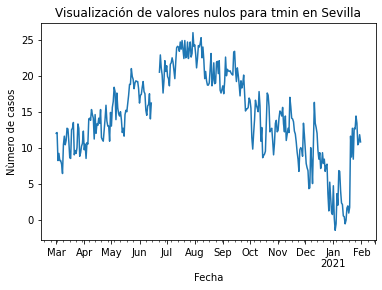

In [21]:
tarjeta[tarjeta.provincia=='SEVILLA'].tmin.plot() # SEVILLA MALAGA ALMERIA JAEN
plt.title("Visualización de valores nulos para tmin en Sevilla")
plt.axis("tight")
plt.xlabel("Fecha")
plt.ylabel("Nùmero de casos")

In [22]:
#tarjeta[tarjeta.provincia=='MALAGA'].num_casos2.plot() # SEVILLA MALAGA ALMERIA JAEN

Text(0, 0.5, 'Nùmero de casos')

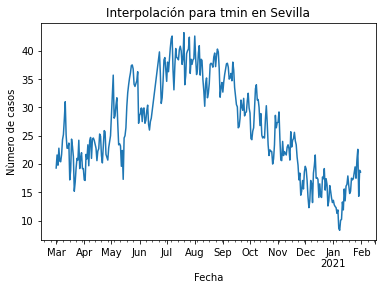

In [23]:
tarjeta[tarjeta.provincia=='SEVILLA'].tmax.interpolate(method="time").plot()  #ts2.interpolate(method="values")
plt.title("Interpolación para tmin en Sevilla")
plt.axis("tight")
plt.xlabel("Fecha")
plt.ylabel("Nùmero de casos")

In [24]:
#tmed_n[tmed_n['tmed'].isnull()]

**Comprobaciio # con linea temporal""

**Atributos**

In [25]:
tarjeta[tarjeta['presMax'].isnull()].shape 

(50, 41)

In [33]:
print(f"tmed : {tarjeta['tmed'].value_counts()}")

tmed :  17.4    72
 16.8    71
 15.8    69
 17.2    67
 15.0    65
         ..
 33.4     1
 34.5     1
 32.1     1
 32.9     1
-3.0      1
Name: tmed, Length: 355, dtype: int64


In [34]:
print (" Numero de registros con valor nulo :",tarjeta[tarjeta['tmed'].isnull()].shape[0] )

 Numero de registros con valor nulo : 12


In [35]:
tarjeta[tarjeta['tmed'].isnull()].provincia.unique()

array(['ALMERIA', 'MALAGA', 'SEVILLA', 'JAEN', 'ZAMORA'], dtype=object)

In [36]:
tarjeta[tarjeta['tmed'].isnull()].shape 

(12, 41)

In [37]:
tarjeta[tarjeta['tmed'].isnull()].tail(9)
provincias = tarjeta[tarjeta['tmed'].isnull()]
provincias.shape

(12, 41)

In [38]:
provs_= tarjeta[tarjeta['tmed'].isnull()].provincia.unique()

In [39]:
for prov in provs_ :
    print(prov, " ---- ", provincias[provincias.provincia == prov].shape[0]) 

ALMERIA  ----  1
MALAGA  ----  1
SEVILLA  ----  8
JAEN  ----  1
ZAMORA  ----  1


In [40]:
 tarjeta[tarjeta['tmed'].isnull()]

,provincia,v_muy_cortos,v_cortos,v_medios,v_largos,v_muy_largos,v_extra_largos,v_noche,v_madrugada,v_mañana,...,altitud,tmed,prec,tmin,tmax,velmedia,sol,presMax,presMin,hr
fecha,,,,,,,,,,,,,,,,,,,,,
2020-04-26,ALMERIA,2.705993e+08,2.890294e+08,242134897.0,2.319908e+08,5755590.0,5448684.0,105980562.0,88929399.0,1.917308e+08,...,21,NaN,0.0,NaN,NaN,5.6,NaN,NaN,NaN,64.0
2020-06-15,MALAGA,1.943742e+09,1.388867e+09,974909382.0,1.054381e+09,72019575.0,35151812.0,403228509.0,537128883.0,1.059335e+09,...,5,NaN,0.0,NaN,NaN,5.0,NaN,1020.7,1017.0,74.0
2020-06-15,SEVILLA,1.965271e+09,1.238683e+09,830760739.0,9.355665e+08,106829867.0,50208887.0,416775721.0,544049125.0,9.721990e+08,...,34,NaN,0.0,NaN,NaN,NaN,3.3,NaN,NaN,54.0
2020-06-16,SEVILLA,2.045814e+09,1.291895e+09,850926921.0,9.598674e+08,106013000.0,43078803.0,386558964.0,617873761.0,1.025942e+09,...,34,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,48.0
2020-06-17,SEVILLA,2.004499e+09,1.277885e+09,859712705.0,9.737789e+08,107436041.0,43937616.0,346798205.0,600123740.0,1.027120e+09,...,34,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0
2020-06-18,SEVILLA,2.006802e+09,1.275273e+09,859524541.0,9.693799e+08,113077133.0,49045133.0,360612441.0,603878655.0,1.030757e+09,...,34,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,48.0
2020-06-19,SEVILLA,1.977093e+09,1.281777e+09,856671579.0,9.738423e+08,149722992.0,81680359.0,367981135.0,589375831.0,1.040291e+09,...,34,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,43.0
2020-06-20,SEVILLA,1.650792e+09,1.054113e+09,703799388.0,7.840856e+08,124271470.0,52059271.0,459708054.0,373572638.0,8.512674e+08,...,34,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,37.0
2020-06-21,SEVILLA,1.514083e+09,9.113946e+08,587443667.0,6.492263e+08,96275448.0,39321128.0,504832785.0,282701392.0,6.373194e+08,...,34,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0


---

**Precipitación**

In [44]:
tarjeta.prec

fecha
2020-03-01    0.0
2020-03-01    0.0
2020-03-01    3.8
2020-03-01    0.0
2020-03-01    6.0
             ... 
2021-01-31    0.5
2021-01-31    0.0
2021-01-31    0.0
2021-01-31    0.0
2021-01-31    0.0
Name: prec, Length: 7077, dtype: float64

In [50]:
for columna in tarjeta.columns:  #Se definen los valores validos según el anexo/contr/...
    
    if columna == 'prec'  :
        print("--- ", columna)

        valores_invalidos_Ip = ['Ip'] 
        valores_validos_Ip = ['0,0'] 
        
        #Se definen los valores validos
        valores_validos = ['0,0','1,0', '2,0','0,1','0,2']
        #identifica/cuenta valores que no cumplen esa condición (incluye los nulos)
        
        resultado_Ip = tarjeta[tarjeta.prec.isin(valores_invalidos_Ip) == True]
        resultado_validos = tarjeta[tarjeta.prec.isin(valores_validos) == True]

        print(f"Cantidad de filas : {tarjeta.shape[0]}")    
        print(f"Resultado _Ip: {resultado_Ip.shape[0]}")
        print(f"Resultado_validos: {resultado_validos.shape[0]}")
        print(f"Resultado comas: {resultado_validos.shape[0]+resultado_Ip.shape[0]}")

        #numf_novalidas = resultado_Ip + resultado_comas 
        print(f"Cantidad de filas con valores no validos  en prec: {resultado_validos.shape[0]}")
        print(f"Porcentaje de filas con valores no valido  en prec: {((resultado_validos.shape[0])/tarjeta.shape[0])*100}%")


---  prec
Cantidad de filas : 7077
Resultado _Ip: 0
Resultado_validos: 0
Resultado comas: 0
Cantidad de filas con valores no validos  en prec: 0
Porcentaje de filas con valores no valido  en prec: 0.0%


## Limpieza

In [58]:
#prec           = tarjeta.apply(lambda row: formato_prec(row), axis=1).rename('prec')
t_max          = pd.DataFrame(tarjeta.tmax.interpolate())
t_min          = pd.DataFrame(tarjeta.tmin.interpolate())
t_med          = pd.DataFrame(tarjeta.tmed.interpolate())
p_max          = pd.DataFrame(tarjeta.presMax.interpolate())
p_min          = pd.DataFrame(tarjeta.presMin.interpolate())
sol            = pd.DataFrame(tarjeta.sol.interpolate()) 
velmedia       = pd.DataFrame(tarjeta.velmedia.interpolate()) 


In [59]:
col_eliminar_met = ['tmax','tmin','tmed','presMax','presMin','sol','velmedia']
tarjeta.drop(columns = col_eliminar_met, axis = 1, inplace = True) 

tarjeta.insert(18,'presMax',p_max)
tarjeta.insert(19,'presMin',p_min)
tarjeta.insert(20,'sol',sol)
tarjeta.insert(21,'tmax',t_max)
tarjeta.insert(22,'tmed',t_med)
tarjeta.insert(23,'tmin',t_min)
tarjeta.insert(24,'velmedia',velmedia)


In [60]:
tarjeta.head()

,provincia,v_muy_cortos,v_cortos,v_medios,v_largos,v_muy_largos,v_extra_largos,v_noche,v_madrugada,v_mañana,...,v_km_tarde,cero_viajes,un_viaje,dos_viajes,mas_de_dos_viajes,num_casos,poblacion,altitud,prec,hr
fecha,,,,,,,,,,,,,,,,,,,,,
2020-03-01,ALICANTE,1.425947e+09,1.318852e+09,1.010684e+09,1.037635e+09,120420418.0,71020690.0,465533067.0,359169359.0,965076794.0,...,5.597685e+09,851314297.0,150474759.0,412014689.0,664243655.0,0.0,1858683,43,0.0,64.0
2020-03-01,ALMERIA,4.341919e+08,4.761268e+08,4.243445e+08,6.949987e+08,68317578.0,59278893.0,183707347.0,153914145.0,388988585.0,...,3.561935e+09,415455807.0,107652858.0,198521970.0,341563750.0,0.0,716820,21,0.0,66.0
2020-03-01,BADAJOZ,5.781239e+08,3.788876e+08,4.537586e+08,8.536597e+08,112599779.0,115993766.0,233059993.0,172586335.0,445212573.0,...,5.202655e+09,812586622.0,135606609.0,288980489.0,403386675.0,2.0,673559,185,3.8,67.0
2020-03-01,CADIZ,1.146933e+09,8.300140e+08,4.833672e+08,4.572328e+08,122149414.0,96728513.0,320083956.0,222828938.0,496650046.0,...,4.746237e+09,432012556.0,103931646.0,280562124.0,534378515.0,0.0,1240155,2,0.0,87.0
2020-03-01,CIUDAD_REAL,4.204837e+08,2.000378e+08,2.208167e+08,4.604185e+08,63507330.0,111473216.0,142928786.0,106146590.0,252656773.0,...,3.030066e+09,480789793.0,92961056.0,183044093.0,216088434.0,0.0,495761,628,6.0,62.0


In [61]:
tarjeta.to_csv("~/Trabajo_tfm/datos_csv/tarjeta_limpia.csv")